In [1]:
import os
import PIL
import pathlib
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop

In [2]:
# Train and test paths
train_path = pathlib.Path('./Data/ISIC_Labelled')
test_path = pathlib.Path('./Data/Test_Data/Test')

In [3]:
train_image_len = len(list(train_path.glob('*/*.jpg')))
print(train_image_len)

test_image_len = len(list(test_path.glob('*/*.jpg')))
print(test_image_len)

25331
1867


In [4]:
batch_size = 64
img_h = 180
img_w = 180

In [5]:
''' data augmentation '''
''' using 80-20 split of data, 80% for training and 20% for validation '''
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    seed=123,
    validation_split= 0.3,
    subset= 'training',
    image_size=(img_h, img_w),
    batch_size = batch_size)

Found 25331 files belonging to 8 classes.
Using 17732 files for training.


In [6]:
validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    seed=123,
    validation_split= 0.3,
    subset= 'validation',
    image_size=(img_h, img_w),
    batch_size = batch_size
)

Found 25331 files belonging to 8 classes.
Using 7599 files for validation.


In [7]:
cancer_categories = train_data.class_names

print(cancer_categories)

['Actinic keratosis', 'Basal cell carcinoma', 'Benign keratosis', 'Dermatofibroma', 'Melanocytic nevus', 'Melanoma', 'Squamous cell carcinoma', 'Vascular lesion']


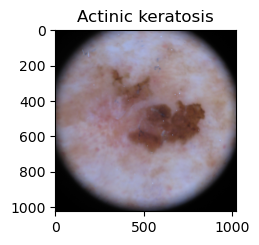

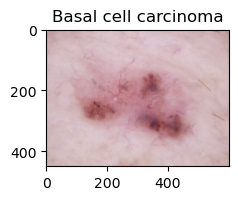

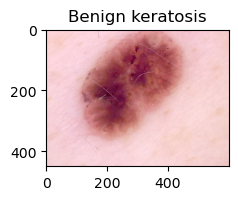

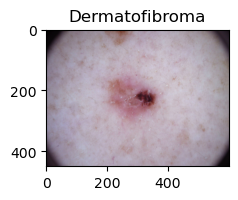

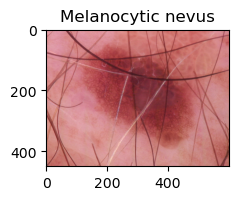

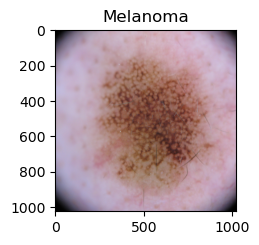

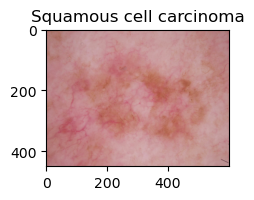

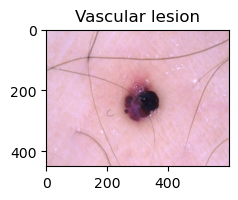

In [9]:
for i in range(len(cancer_categories)): 
    plt.figure(figsize=(8, 8))
    plt.subplot(3, 3, i + 1)
    img = mpimg.imread(str(list(train_path.glob(cancer_categories[i]+'/*.jpg'))[1]))
    plt.title(cancer_categories[i])
    plt.imshow(img)

In [8]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_data = validation_data.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
''' Model '''
n_c = 9

''' preprocessing layer '''
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_h, img_w, 3))])

''' Convolutional Layers '''
model.add(Conv2D(filters=32, kernel_size=(7, 7), padding='Same', activation ='relu'))

# model.add(Conv2D(filters=32, kernel_size=(5, 5), padding = 'Same', activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='Same', activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(filters=128, kernel_size=(5, 5), padding='Same', activation ='relu'))

# # model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='Same', activation ='relu'))

# model.add(Conv2D(filters=256, kernel_size=(5, 5), padding='Same', activation ='relu'))

# model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='Same', activation ='relu'))

# model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='Same', activation ='relu'))

# model.add(Conv2D(filters=256, kernel_size=(1, 1), padding='Same', activation ='relu'))

''' adding dropout '''
# model.add(Dropout(0.25))
model.add(Flatten())

''' Classification Layer'''
model.add(Dense(n_c, activation = "softmax"))

In [11]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      4736      
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       7

In [13]:
epochs = 20
history = model.fit(train_data, validation_data=validation_data, epochs=epochs)

Epoch 1/20


/Users/venkatkishor/anaconda3/lib/python3.11/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2024-02-29 12:35:35.506651: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:15: Filling up shuffle buffer (this may take a while): 96 of 1000
2024-02-29 12:35:53.652580: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


278/278 [==============================] - 443s 1s/step - loss: 1.3639 - accuracy: 0.5180 - val_loss: 1.2747 - val_accuracy: 0.5542
Epoch 2/20
278/278 [==============================] - 422s 2s/step - loss: 1.2429 - accuracy: 0.5488 - val_loss: 1.2182 - val_accuracy: 0.5767
Epoch 3/20
278/278 [==============================] - 448s 2s/step - loss: 1.1691 - accuracy: 0.5713 - val_loss: 1.1293 - val_accuracy: 0.5948
Epoch 4/20
278/278 [==============================] - 451s 2s/step - loss: 1.1100 - accuracy: 0.5956 - val_loss: 1.1079 - val_accuracy: 0.6042
Epoch 5/20
278/278 [==============================] - 540s 2s/step - loss: 1.0920 - accuracy: 0.6008 - val_loss: 1.1032 - val_accuracy: 0.5965
Epoch 6/20
278/278 [==============================] - 583s 2s/step - loss: 1.0478 - accuracy: 0.6140 - val_loss: 1.0611 - val_accuracy: 0.6113
Epoch 7/20
278/278 [==============================] - 543s 2s/step - loss: 0.9979 - accuracy: 0.6338 - val_loss: 1.0745 - val_accuracy: 0.6149
Epoch 8/20

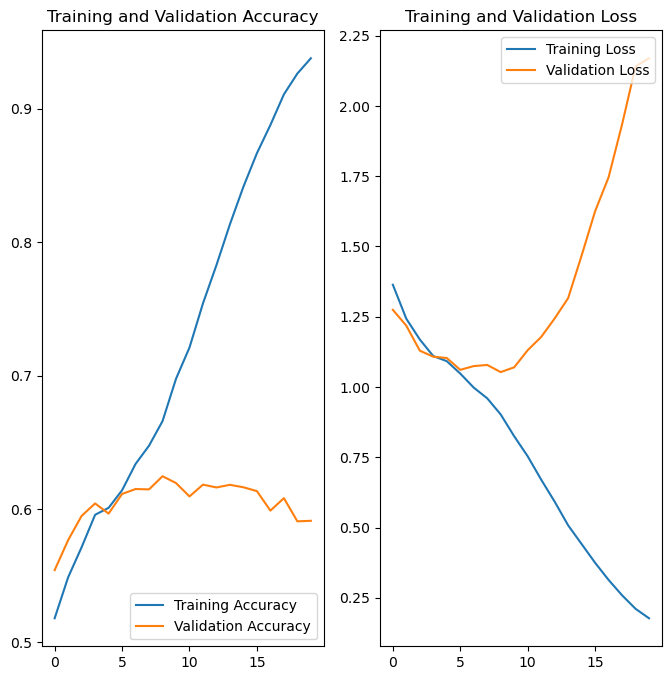

In [14]:
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

''' plotting training loss and validation loss graph '''
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
''' Model '''
n_c = 9

''' preprocessing layer '''
model2 = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_h, img_w, 3))])

''' Convolutional Layers '''
model2.add(Conv2D(filters=32, kernel_size=(7, 7), padding='Same', activation ='relu'))

model2.add(Dropout(0.3))

model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation ='relu'))

model2.add(Dropout(0.3))

model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation ='relu'))

model2.add(Dropout(0.3))

model2.add(MaxPool2D(pool_size=(2,2)))

''' adding dropout '''
# model2.add(Dropout(0.25))
model2.add(Flatten())

''' Classification Layer'''
model2.add(Dense(n_c, activation = "softmax"))

In [12]:
model2.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [13]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      4736      
                                                                 
 dropout (Dropout)           (None, 180, 180, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        51264     
                                                                 
 dropout_1 (Dropout)         (None, 90, 90, 64)        0         
                                                        

In [14]:
epochs = 20
history = model2.fit(train_data, validation_data=validation_data, epochs=epochs)

Epoch 1/20


/Users/venkatkishor/anaconda3/lib/python3.11/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2024-03-17 20:55:01.903697: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:15: Filling up shuffle buffer (this may take a while): 89 of 1000
2024-03-17 20:55:20.512337: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


278/278 [==============================] - 509s 2s/step - loss: 1.3207 - accuracy: 0.5239 - val_loss: 1.3686 - val_accuracy: 0.5472
Epoch 2/20
278/278 [==============================] - 494s 2s/step - loss: 1.1931 - accuracy: 0.5704 - val_loss: 1.3155 - val_accuracy: 0.5902
Epoch 3/20
278/278 [==============================] - 496s 2s/step - loss: 1.1343 - accuracy: 0.5875 - val_loss: 1.3055 - val_accuracy: 0.5726
Epoch 4/20
278/278 [==============================] - 504s 2s/step - loss: 1.0900 - accuracy: 0.6019 - val_loss: 1.2660 - val_accuracy: 0.6085
Epoch 5/20
278/278 [==============================] - 511s 2s/step - loss: 1.0352 - accuracy: 0.6210 - val_loss: 1.2753 - val_accuracy: 0.5989
Epoch 6/20
278/278 [==============================] - 551s 2s/step - loss: 0.9956 - accuracy: 0.6360 - val_loss: 1.2405 - val_accuracy: 0.6148
Epoch 7/20
278/278 [==============================] - 582s 2s/step - loss: 0.9472 - accuracy: 0.6556 - val_loss: 1.2283 - val_accuracy: 0.6061
Epoch 8/20

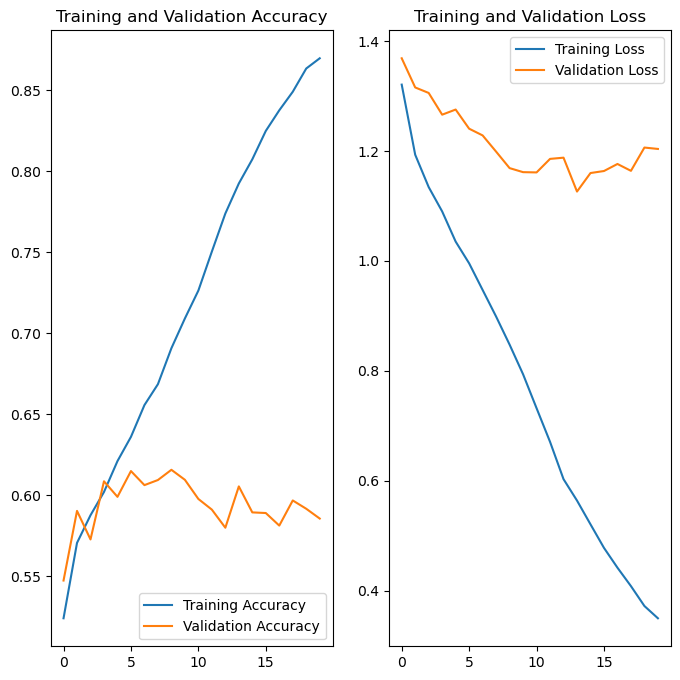

In [15]:
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

''' plotting training loss and validation loss graph '''
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
augmentation = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical", 
                                                                          input_shape=(img_h,img_w,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), 
                                                                          width_factor=(0.2, 0.3), fill_mode='reflect')])

In [14]:
n_c = 9

''' preprocess layer '''
model3 = Sequential([augmentation, layers.experimental.preprocessing.Rescaling(1./255, 
                                                                              input_shape=(img_h, img_w,3))])

model3.add(Conv2D(filters=32, kernel_size=(7, 7), padding='Same', activation ='relu'))

model3.add(Dropout(0.3))

model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation ='relu'))

model3.add(Dropout(0.3))

model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation ='relu'))

model3.add(Dropout(0.3))

model3.add(MaxPool2D(pool_size=(2,2)))

''' adding dropout '''
# model3.add(Dropout(0.25))
model3.add(Flatten())

''' Classification Layer'''
model3.add(Dense(n_c, activation = "softmax"))

In [15]:
model3.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [16]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 32)      4736      
                                                                 
 dropout_3 (Dropout)         (None, 180, 180, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 64)        51264     
                                                      

In [17]:
epochs = 20
history = model3.fit(train_data, validation_data=validation_data, epochs=epochs)

Epoch 1/20


/Users/venkatkishor/anaconda3/lib/python3.11/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2024-03-21 15:28:00.349516: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:15: Filling up shuffle buffer (this may take a while): 91 of 1000
2024-03-21 15:28:18.242898: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


278/278 [==============================] - 482s 2s/step - loss: 1.3890 - accuracy: 0.5109 - val_loss: 1.4591 - val_accuracy: 0.5274
Epoch 2/20
278/278 [==============================] - 494s 2s/step - loss: 1.2460 - accuracy: 0.5469 - val_loss: 1.3586 - val_accuracy: 0.5430
Epoch 3/20
278/278 [==============================] - 524s 2s/step - loss: 1.2017 - accuracy: 0.5660 - val_loss: 1.3295 - val_accuracy: 0.5644
Epoch 4/20
278/278 [==============================] - 543s 2s/step - loss: 1.1776 - accuracy: 0.5814 - val_loss: 1.3947 - val_accuracy: 0.5660
Epoch 5/20
278/278 [==============================] - 569s 2s/step - loss: 1.1634 - accuracy: 0.5817 - val_loss: 1.2858 - val_accuracy: 0.5831
Epoch 6/20
278/278 [==============================] - 532s 2s/step - loss: 1.1524 - accuracy: 0.5854 - val_loss: 1.3000 - val_accuracy: 0.5856
Epoch 7/20
278/278 [==============================] - 851s 3s/step - loss: 1.1347 - accuracy: 0.5919 - val_loss: 1.2916 - val_accuracy: 0.5757
Epoch 8/20

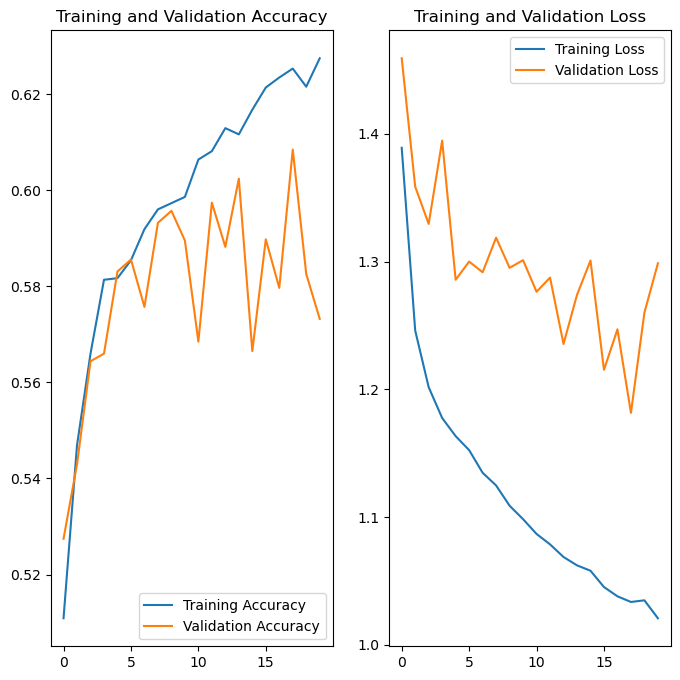

In [18]:
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

''' plotting training loss and validation loss graph '''
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
n_c = 9

''' preprocess layer '''
model4 = Sequential([augmentation, layers.experimental.preprocessing.Rescaling(1./255, 
                                                                              input_shape=(img_h, img_w,3))])

model4.add(Conv2D(filters=32, kernel_size=(7, 7), padding='Same', activation ='relu'))

# model4.add(Dropout(0.25))

model4.add(MaxPool2D(pool_size=(2,2)))

model4.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation ='relu'))

model4.add(MaxPool2D(pool_size=(2,2)))

model4.add(Conv2D(filters=128, kernel_size=(3, 3), padding='Same', activation ='relu'))

model4.add(Dropout(0.25))

model4.add(MaxPool2D(pool_size=(2,2)))

''' adding dropout '''
# model4.add(Dropout(0.25))
model4.add(Flatten())

''' Classification Layer'''
model4.add(Dense(n_c, activation = "softmax"))

In [29]:
model4.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [30]:
model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 180, 180, 32)      4736      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 90, 90, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 90, 90, 64)        51264     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 45, 45, 64)        0         
 ng2D)                                                

In [ ]:
epochs = 20
history = model4.fit(train_data, validation_data=validation_data, epochs=epochs)

Epoch 1/20
278/278 [==============================] - 467s 2s/step - loss: 1.3624 - accuracy: 0.5177 - val_loss: 1.2992 - val_accuracy: 0.5299
Epoch 2/20
278/278 [==============================] - 543s 2s/step - loss: 1.2532 - accuracy: 0.5423 - val_loss: 1.2641 - val_accuracy: 0.5578
Epoch 3/20
278/278 [==============================] - 570s 2s/step - loss: 1.2049 - accuracy: 0.5647 - val_loss: 1.1973 - val_accuracy: 0.5789
Epoch 4/20
278/278 [==============================] - 579s 2s/step - loss: 1.1736 - accuracy: 0.5774 - val_loss: 1.1906 - val_accuracy: 0.5689
Epoch 5/20
278/278 [==============================] - 554s 2s/step - loss: 1.1364 - accuracy: 0.5906 - val_loss: 1.1804 - val_accuracy: 0.5786
Epoch 6/20
278/278 [==============================] - 592s 2s/step - loss: 1.1132 - accuracy: 0.5975 - val_loss: 1.1129 - val_accuracy: 0.5967
Epoch 7/20
278/278 [==============================] - 597s 2s/step - loss: 1.0873 - accuracy: 0.6047 - val_loss: 1.1212 - val_accuracy: 0.5884